# Projeto #1 - Análise Exploratória de Dados

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_1#instru%C3%A7%C3%B5es) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_1#crit%C3%A9rios-de-avalia%C3%A7%C3%A3o)


### 1) **(5%)** Qual a base escolhida e qual seu interesse nela?

ENEM 2016 - Data from ENEM 2016, the Brazilian High School National Exam. 
Disponível em https://www.kaggle.com/gbonesso/enem-2016
Exploração de dados sobre resultados do ENEM (entrantes do ensino superior) pode auxiliar projetos de pesquisa em desenvolvimento no LATACI Research Institute, onde atuo.
O arquivo original possui mais de 8 milhões de linhas, e optei por gerar um com apenas 15 mil linhas para este projeto.
Função create_subset() disponível em maxpy

In [189]:
import maxpy

arquivo = maxpy.create_subset("microdados_enem_2016_coma.csv", 15000)

### 2) **(5%)** Descrição básica do conjunto de dados escolhido pelo aluno (1 parágrafo).
- O arquivo original possui 166 colunas. Para este projeto, serão selecionados estados e municípios de residência e de realização das provas; idade; sexo; se é treineiro ou não; os códigos (tipos) e as notas de Ciências da Natureza (CN), Ciências Humanas (CH), Linguagens e Códigos (LC), Matemática (MAT) e redação; se possui dislexia, discalculia ou algum outro tipo de deficiência (baixa visão, cegueira, surdez, deficiência auditiva, surdo e cego, deficiência física, déficit de atenção, autismo, visão monocular, outra deficiência). Os tipos de deficiência seguem as colunas definidas no arquivo. O arquivo agora possui 19 colunas.
- Todas as variáveis selecionadas são discretas, exceto as notas.


In [190]:
enem2016 = pd.read_csv(arquivo, encoding = "ISO-8859-1")

# Testar valores únicos de IN_BAIXA_VISAO, IN_CEGUEIRA, IN_SURDEZ, IN_DEFICIENCIA_AUDITIVA, IN_SURDO_CEGUEIRA, IN_DEFICIENCIA_FISICA, IN_DEFICIENCIA_MENTAL, IN_DEFICIT_ATENCAO, IN_AUTISMO, IN_VISAO_MONOCULAR, IN_OUTRA_DEF
maxpy.unique_values(enem2016, 'IN_BAIXA_VISAO')
maxpy.unique_values(enem2016, 'IN_CEGUEIRA')
maxpy.unique_values(enem2016, 'IN_SURDEZ')
maxpy.unique_values(enem2016, 'IN_DEFICIENCIA_AUDITIVA')
maxpy.unique_values(enem2016, 'IN_SURDO_CEGUEIRA')
maxpy.unique_values(enem2016, 'IN_DEFICIENCIA_FISICA')
maxpy.unique_values(enem2016, 'IN_DEFICIENCIA_MENTAL')
maxpy.unique_values(enem2016, 'IN_DEFICIT_ATENCAO')
maxpy.unique_values(enem2016, 'IN_AUTISMO')
maxpy.unique_values(enem2016, 'IN_VISAO_MONOCULAR')
maxpy.unique_values(enem2016, 'IN_OUTRA_DEF')

# Agrupar as colunas de outras deficiências em uma única coluna. O arquivo agora tem 22 colunas
enem2016['outra_def'] = 'NaN'
for index, row in enem2016.iterrows():
    enem2016.loc[index,'outra_def'] = bool(enem2016.loc[index, 'IN_BAIXA_VISAO']) or bool(enem2016.loc[index, 'IN_CEGUEIRA']) or bool(enem2016.loc[index, 'IN_SURDEZ']) or bool(enem2016.loc[index, 'IN_DEFICIENCIA_AUDITIVA']) or bool(enem2016.loc[index, 'IN_SURDO_CEGUEIRA']) or bool(enem2016.loc[index, 'IN_DEFICIENCIA_FISICA']) or bool(enem2016.loc[index, 'IN_DEFICIENCIA_MENTAL']) or bool(enem2016.loc[index, 'IN_DEFICIT_ATENCAO']) or bool(enem2016.loc[index, 'IN_AUTISMO']) or bool(enem2016.loc[index, 'IN_VISAO_MONOCULAR']) or bool(enem2016.loc[index, 'IN_OUTRA_DEF'])

# Selecionar colunas
enem2016 = enem2016[['NU_IDADE', 'TP_SEXO', 'IN_TREINEIRO', 'NO_MUNICIPIO_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NO_MUNICIPIO_PROVA', 'SG_UF_PROVA', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'outra_def', 'CO_PROVA_CN', 'NU_NOTA_CN', 'CO_PROVA_CH', 'NU_NOTA_CH', 'CO_PROVA_LC', 'NU_NOTA_LC', 'CO_PROVA_MT', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']]

# Renomear colunas
enem2016.columns = ['idade', 'sexo', 'treineiro', 'munic_resid', 'uf_resid', 'munic_prova', 'uf_prova', 'dislexia', 'discalculia', 'outra_def', 'cod_prova_cn', 'nota_cn', 'cod_prova_ch', 'nota_ch', 'cod_prova_lc', 'nota_lc', 'cod_prova_mat', 'nota_mat', 'nota_redacao']

enem2016.head(5)


Valores distintos de IN_BAIXA_VISAO [0 1]
Valores distintos de IN_CEGUEIRA [0 1]
Valores distintos de IN_SURDEZ [0 1]
Valores distintos de IN_DEFICIENCIA_AUDITIVA [0 1]
Valores distintos de IN_SURDO_CEGUEIRA [0 1]
Valores distintos de IN_DEFICIENCIA_FISICA [0 1]
Valores distintos de IN_DEFICIENCIA_MENTAL [0 1]
Valores distintos de IN_DEFICIT_ATENCAO [0 1]
Valores distintos de IN_AUTISMO [0 1]
Valores distintos de IN_VISAO_MONOCULAR [0 1]
Valores distintos de IN_OUTRA_DEF [0 1]


,idade,sexo,treineiro,munic_resid,uf_resid,munic_prova,uf_prova,dislexia,discalculia,outra_def,cod_prova_cn,nota_cn,cod_prova_ch,nota_ch,cod_prova_lc,nota_lc,cod_prova_mat,nota_mat,nota_redacao
0,23,M,0,João Pessoa,PB,João Pessoa,PB,0,0,False,292.0,550.0,296.0,629.4,300.0,574.0,304.0,462.9,580.0
1,20,M,0,Vitorino,PR,Pato Branco,PR,0,0,False,294.0,576.6,298.0,669.8,301.0,610.1,305.0,423.6,560.0
2,21,M,0,Salvador,BA,Salvador,BA,0,0,False,292.0,485.8,296.0,576.9,299.0,637.4,303.0,414.6,480.0
3,17,M,0,Belém,PA,Belém,PA,0,0,False,294.0,571.4,298.0,628.6,299.0,646.2,303.0,709.4,620.0
4,36,F,0,Brasília,DF,Brasília,DF,1,1,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*Descrição da base e suas variáveis*

### 3) **(15%)** Faça uma avaliação descritiva da sua base. Quantas linhas ela possui? Quais os tipos de dados? Quantas e quais features possuem?

Cada variável escolhida pelo aluno precisa passar por ao menos 1 pré-processamento. O pré-processamento pode ser (mas não está limitado a):
- Checagem se os valores estão dentro de um limite permitido ou razoável.
- Tratamento de valores ausentes por eliminação ou substituição.
- Conversão do tipo de dados.


In [252]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.
# Calcular número de linhas e colunas
# Listar features e seu tipo de dados
maxpy.show_df(enem2016)

# A diferença aparentemente se justifica por desistência no segundo dia, pois as provas de CN e CH foram realizadas no dia 05/11/16, e as de LC, MAT e Redação no dia 06/11/2016, conforme veiculado em https://www.enem.vestibulandoweb.com.br/data-enem-2016.html
# As linhas sem todas as provas serão eliminadas no pré-processamento


AttributeError: module 'maxpy' has no attribute 'show_df'

In [0]:
# PRÉ-PROCESSAMENTO DE CADA UMA DAS 19 FEATURES - ANÁLISE INICIAL
# 1. idade
maxpy.unique_values(enem2016, 'idade')

# 2. sexo
maxpy.unique_values(enem2016, 'sexo')

# 3. treineiro
maxpy.unique_values(enem2016, 'treineiro')

# 4 e 5. munic_resid e uf_resid
maxpy.unique_values(enem2016, 'uf_resid')

# 6 e 7. munic_prova e uf_prova
maxpy.unique_values(enem2016, 'uf_prova')

# 8. dislexia
maxpy.unique_values(enem2016, 'dislexia')

# 9. discalculia
maxpy.unique_values(enem2016, 'discalculia')

# 10. outra_def
maxpy.unique_values(enem2016, 'outra_def')

# 11 e 12. cod_prova_cn e nota_cn
maxpy.unique_values(enem2016, 'cod_prova_cn')
# eliminar registros com cod_prova nulos
enem2016 = enem2016.dropna(subset=['cod_prova_cn'])

# 13 e 14. cod_prova_ch e nota_ch
maxpy.unique_values(enem2016, 'cod_prova_ch')
# eliminar registros com cod_prova nulos
enem2016 = enem2016.dropna(subset=['cod_prova_ch'])

# 15 e 16. cod_prova_lc e nota_lc
maxpy.unique_values(enem2016, 'cod_prova_lc')
# eliminar registros com cod_prova nulos
enem2016 = enem2016.dropna(subset=['cod_prova_lc'])

# 17 e 18. cod_prova_mat e nota_mat
maxpy.unique_values(enem2016, 'cod_prova_mat')
# eliminar registros com cod_prova nulos
enem2016 = enem2016.dropna(subset=['cod_prova_mat'])

# 19. nota_redacao


# Resumo
maxpy.show_lines()

### 4) **(60%)** Nos blocos seguintes construa análises que vão justificar suas conclusões.

#### 4.1) **(20%)** Análise 1 -  Distribuição dos valores para cada uma das variáveis
- Exemplo para variável contínua: se o conjunto de dados possui a variável "idade". Quantos % possui a idade entre 0 e 30 anos? 31 a 59? 60+?

- Exemplo para variável discreta: se o conjunto de dados possui a variável "gênero", quantos % do conjunto de dados é do sexo feminino, quantos % é masculino? Inclua outros gêneros se houver.


0 a 30: 87.15% - 9430 de 10820 registros 
31 a 59: 12.69% - 1373 de 10820 registros 
60+: 0.16% - 17 de 10820 registros


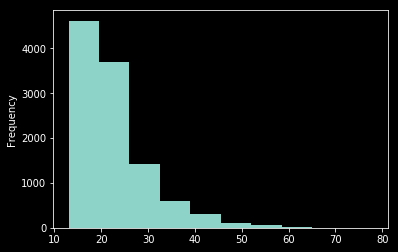

In [369]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

# Quantos % possui a idade entre 0 e 30 anos? 31 a 59? 60+?
faixa_etaria = {'0-30':0, '31-59':0, '60+':0}
total = 0
for idade in enem2016['idade']:
    total += 1
    if idade < 31:
        faixa_etaria['0-30'] += 1
    elif idade < 60:
        faixa_etaria['31-59'] += 1
    else:
        faixa_etaria['60+'] += 1

perc_0_30 = 100 * faixa_etaria['0-30'] / total
perc_31_59 = 100 * faixa_etaria['31-59'] / total
perc_60 = 100 * faixa_etaria['60+'] / total

print(f'0 a 30: {perc_0_30:.2f}% - {faixa_etaria["0-30"]} de {total} registros \n31 a 59: {perc_31_59:.2f}% - {faixa_etaria["31-59"]} de {total} registros \n60+: {perc_60:.2f}% - {faixa_etaria["60+"]} de {total} registros')

# outro modo
bins = [0, 31, 60, np.inf]
labels = ["0-30", "31-59", "60+"]
enem2016["faixa_etaria"] = pd.cut(enem2016["idade"], bins, labels=labels)

# histograma
enem2016["idade"].plot(kind="hist")


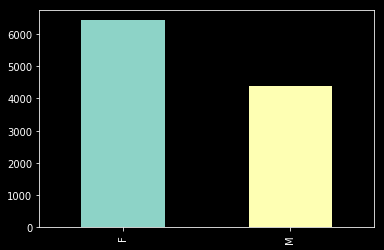

In [370]:
# Quantos % do conjunto de dados é do sexo feminino, quantos % é masculino?
enem2016["sexo"].value_counts().plot(kind="bar")

#### 4.2) **(20%)** Análise 2 - Dependência entre variáveis
O aluno deve apresentar as mesmas distribuições para cada valor da variável dependente. Exemplo: Em um conjunto de dados em que as variáveis independentes são idade e sexo, e a variável dependente é renda. O aluno pode dividir a renda em 3 "grupos", <1000 reais, entre 1000 e 10000 reais e >1000 reais. Para cada um desses grupos, é necessário apresentar a distribuição das variáveis "idade" e "sexo".


In [371]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

#### 4.3) **(20%)** Análise 3 - Correlação entre variáveis

O aluno deve apresentar 3 análises de correlação entre variáveis do conjunto de dados trabalhado. Exemplo: Em um conjunto de dados com as informações de temperatura e ocorrência de incêndios, eu gostaria de saber a incidência de correlação entre as duas variáveis.



In [372]:
# Primeiro par de variáveis: Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

In [373]:
# Segundo par de variáveis: Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

In [374]:
# Terceiro par de variáveis: Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

### 5) Conclusões **15%**

*O que é possível concluir com os dados que você analisou? Se fosse fazer uma apresentação, o que levaria como os maiores destaques e por que?*